<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.636396  59.621251  71.311720 -0.000430  203.568937   
      1.0    81.462764  57.347198  47.160506  0.001285  195.971752   
      2.0    69.413709  50.316991  38.608854 -0.001151  168.338403   
      3.0    97.416442  36.548108  67.170318  0.004793  211.139660   
      4.0    48.907890  21.775968  80.421043  0.009854  161.114755   
...                ...        ...        ...       ...         ...   
999.0 115.0  20.857714  46.988897  65.585601 -0.001846  143.430366   
      116.0  56.493301  89.309098  93.287684  0.001386  249.091468   
      117.0  41.473854  78.144097  34.187442  0.000243  163.805637   
      118.0  74.853999  48.275706  70.085657 -0.001620  203.213743   
      119.0  51.299693  74.003794  82.152189  0.000775  217.456452   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.569506 -0.000570  
      1.0    195.971280  0.000472  
      2.0    168.340608 -0.002205  
      3.0    211.135543  0.004118  
      4.0    161.105256  0.009499  
...                 ...       ...  
999.0 115.0  143.431926 -0.001560  
      116.0  249.090411  0.001057  
      117.0  163.805390  0.000246  
      118.0  203.215486 -0.001744  
      119.0  217.455836  0.000616  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.636396  59.621251  71.311720 -0.000430  203.568937   
      1.0    81.462764  57.347198  47.160506  0.001285  195.971752   
      2.0    69.413709  50.316991  38.608854 -0.001151  168.338403   
      3.0    97.416442  36.548108  67.170318  0.004793  211.139660   
      4.0    48.907890  21.775968  80.421043  0.009854  161.114755   
...                ...        ...        ...       ...         ...   
999.0 115.0  20.857714  46.988897  65.585601 -0.001846  143.430366   
      116.0  56.493301  89.309098  93.287684  0.001386  249.091468   
      117.0  41.473854  78.144097  34.187442  0.000243  163.805637   
      118.0  74.853999  48.275706  70.085657 -0.001620  203.213743   
      119.0  51.299693  74.003794  82.152189  0.000775  217.456452   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.569506 -0.000570  
      1.0    195.971280  0.000472  
      2.0    168.340608 -0.002205  
      3.0    211.135543  0.004118  
      4.0    161.105256  0.009499  
...                 ...       ...  
999.0 115.0  143.431926 -0.001560  
      116.0  249.090411  0.001057  
      117.0  163.805390  0.000246  
      118.0  203.215486 -0.001744  
      119.0  217.455836  0.000616  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.636396  59.621251  71.311720 -0.000430  203.568937   
      1.0    81.462764  57.347198  47.160506  0.001285  195.971752   
      2.0    69.413709  50.316991  38.608854 -0.001151  168.338403   
      3.0    97.416442  36.548108  67.170318  0.004793  211.139660   
      4.0    48.907890  21.775968  80.421043  0.009854  161.114755   
...                ...        ...        ...       ...         ...   
999.0 115.0  20.857714  46.988897  65.585601 -0.001846  143.430366   
      116.0  56.493301  89.309098  93.287684  0.001386  249.091468   
      117.0  41.473854  78.144097  34.187442  0.000243  163.805637   
      118.0  74.853999  48.275706  70.085657 -0.001620  203.213743   
      119.0  51.299693  74.003794  82.152189  0.000775  217.456452   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.569506 -0.000570  
      1.0    195.971280  0.000472  
      2.0    168.340608 -0.002205  
      3.0    211.135543  0.004118  
      4.0    161.105256  0.009499  
...                 ...       ...  
999.0 115.0  143.431926 -0.001560  
      116.0  249.090411  0.001057  
      117.0  163.805390  0.000246  
      118.0  203.215486 -0.001744  
      119.0  217.455836  0.000616  

[120000 rows x 7 columns]

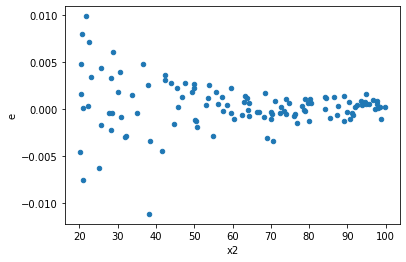

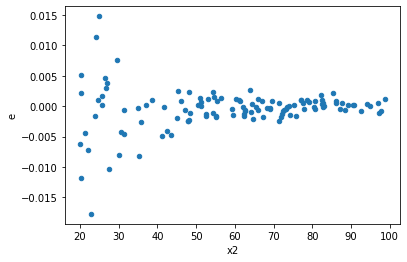

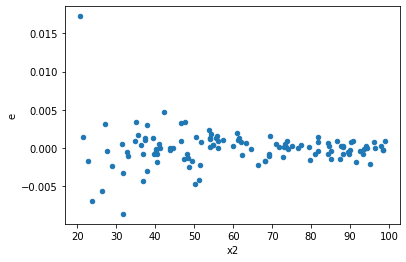

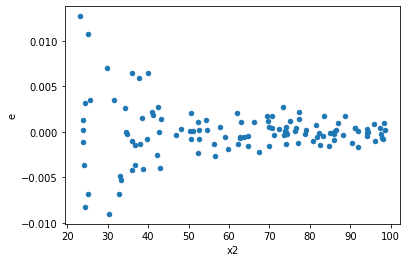

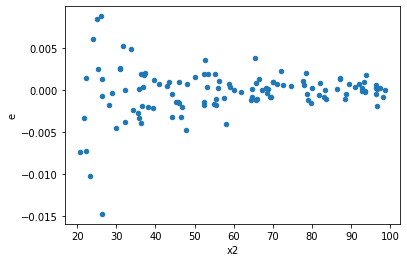

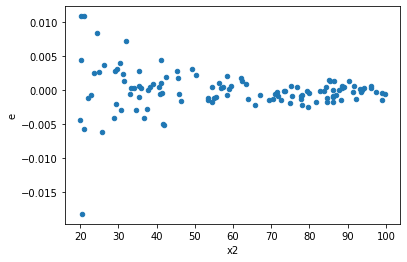

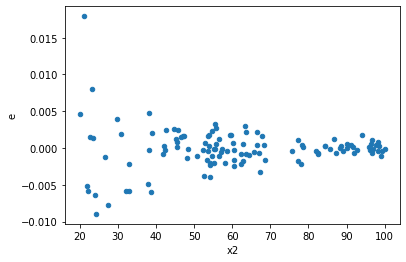

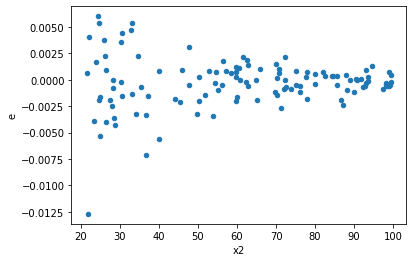

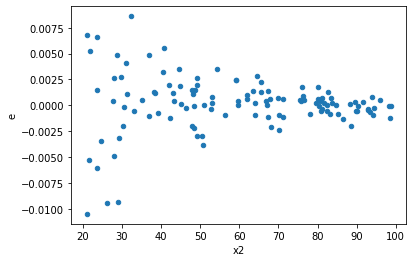

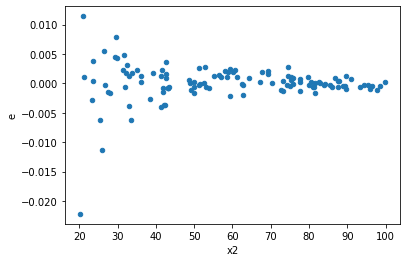

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,63.0,51.0,0.00013473770439506453,0.0005591582628051529,2.13869372055658e-06,1.096388750598339e-05,5.1264411545240405,1.4747551846383544e-08,0.9999999926262241,7.373775923191772e-09,Reject001=0 : Heteroscedasticity
3.0,61.0,53.0,0.00024150092651215984,0.0007110420996703881,3.959031582166555e-06,1.341588867302619e-05,3.3886793764055883,1.1783053447622649e-05,0.9999941084732762,5.8915267238113245e-06,Reject001=0 : Heteroscedasticity
11.0,51.0,63.0,0.0002657707433212215,0.00048666850632850175,5.211191045514147e-06,7.724896925849234e-06,1.482366863617275,0.1372714134247408,0.9313642932876296,0.0686357067123704,Reject001=1 : Homoscedasticity
12.0,60.0,54.0,0.0003977767178733689,0.000829794658982482,6.629611964556148e-06,1.5366567758934852e-05,2.317868352037651,0.002041032959615663,0.9989794835201922,0.0010205164798078314,Reject001=0 : Heteroscedasticity
13.0,47.0,67.0,0.00010169232847975028,0.0006881710421629278,2.163666563398942e-06,1.027120958452131e-05,4.747131447271656,8.417504693269962e-09,0.9999999957912477,4.208752346634981e-09,Reject001=0 : Heteroscedasticity
14.0,61.0,53.0,0.0001256406770613019,0.0007794766559383122,2.059683230513146e-06,1.4707106715817212e-05,7.140470193639003,1.4999113062685865e-11,0.9999999999925004,7.499556531342932e-12,Reject001=0 : Heteroscedasticity
17.0,58.0,56.0,0.0002845416922762067,0.001153203848918257,4.905891246141495e-06,2.0592925873540304e-05,4.197591189926342,2.4304569490318784e-07,0.9999998784771525,1.2152284745159392e-07,Reject001=0 : Heteroscedasticity
19.0,70.0,44.0,0.0006046016922791674,0.0007827677542840637,8.637167032559535e-06,1.779017623372872e-05,2.059723537435953,0.01144732412418037,0.9942763379379098,0.005723662062090185,Reject001=1 : Homoscedasticity
22.0,69.0,45.0,0.00034957656699548115,0.0005854808268458216,5.066327057905524e-06,1.3010685041018258e-05,2.568070496103546,0.0010252793596818854,0.9994873603201591,0.0005126396798409427,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,69.0,0.0005087276172206559,0.00020850008631537463,1.1305058160459021e-05,3.021740381382241e-06,0.26729100713087783,7.313174888371828e-06,Reject001=0 : Heteroscedasticity
1.0,59.0,55.0,0.0011979604582624663,0.0002587566161754129,2.0304414546821462e-05,4.704665748643871e-06,0.2317065452832945,1.0473508348279019e-07,Reject001=0 : Heteroscedasticity
2.0,63.0,51.0,0.00013473770439506453,0.0005591582628051529,2.13869372055658e-06,1.096388750598339e-05,5.1264411545240405,1.4747551846383544e-08,Reject001=0 : Heteroscedasticity
3.0,61.0,53.0,0.00024150092651215984,0.0007110420996703881,3.959031582166555e-06,1.341588867302619e-05,3.3886793764055883,1.1783053447622649e-05,Reject001=0 : Heteroscedasticity
4.0,46.0,68.0,0.000603677021312085,0.0003124958512360467,1.3123413506784455e-05,4.59552722405951e-06,0.35017773551703946,0.00025739338088003673,Reject001=0 : Heteroscedasticity
5.0,57.0,57.0,0.0009289740569025345,0.0001357226940354593,1.629779047197429e-05,2.381099895358935e-06,0.14609955254078635,1.3174200111531364e-11,Reject001=0 : Heteroscedasticity
6.0,53.0,61.0,0.0006692745750661414,0.00023984988669295378,1.262782217105927e-05,3.931965355622193e-06,0.31137319660974955,2.6634764317487294e-05,Reject001=0 : Heteroscedasticity
7.0,59.0,55.0,0.0005696992659216576,0.0001083291973931943,9.655919761384027e-06,1.969621770785351e-06,0.20398075164856547,9.122843031021117e-09,Reject001=0 : Heteroscedasticity
8.0,60.0,54.0,0.0006538681321770134,0.00020908915812780195,1.0897802202950224e-05,3.872021446811147e-06,0.3553029661120959,0.0001230666021114044,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    845
Reject001=1 : Homoscedasticity      155
Name: Result_test, dtype: int64